Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [84]:
import requests
import os
import re
from IPython.display import JSON 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes = True)

In [85]:
df_marseille_data = pd.read_csv("../data/df_marseille_stations.csv")
df_pois_data = pd.read_csv("../data/df_yelp_data.csv")
df_joined_data = pd.merge(df_marseille_data, df_pois_data, how="outer")

In [86]:
df_joined_data.to_csv("../data/df_joined_data", index=False)

print(df_joined_data[:10])

   Unnamed: 0                   Name   Latitude  Longitude  free_bikes  \
0           0     Cours Jean Ballard  43.293009   5.374584         0.0   
1           1        Allées Gambetta  43.299028   5.381509         0.0   
2           2     Réformés Canebière  43.299717   5.384845         2.0   
3           3            Coutellerie  43.296800   5.372910         1.0   
4           4    Canebiere - Beauvau  43.295279   5.375048         0.0   
5           5      Colbert Ste Barbe  43.299243   5.374807         3.0   
6           6          Centre Bourse  43.296935   5.376544         1.0   
7           7  Saint-Ferréol - Davso  43.293600   5.378350         1.0   
8           8    Flammarion - Isoard  43.304278   5.388868         1.0   
9           9     Longchamp - Grobet  43.302992   5.392136         1.0   

  Category  Distance Address  Review_count  Rating  
0      NaN       NaN     NaN           NaN     NaN  
1      NaN       NaN     NaN           NaN     NaN  
2      NaN       NaN     N

In [87]:
df_joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    687 non-null    int64  
 1   Name          687 non-null    object 
 2   Latitude      687 non-null    float64
 3   Longitude     687 non-null    float64
 4   free_bikes    186 non-null    float64
 5   Category      501 non-null    object 
 6   Distance      501 non-null    float64
 7   Address       496 non-null    object 
 8   Review_count  501 non-null    float64
 9   Rating        501 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 53.8+ KB


In [88]:
df_joined_data.head()


,Unnamed: 0,Name,Latitude,Longitude,free_bikes,Category,Distance,Address,Review_count,Rating
0,0,Cours Jean Ballard,43.293009,5.374584,0.0,NaN,NaN,NaN,NaN,NaN
1,1,Allées Gambetta,43.299028,5.381509,0.0,NaN,NaN,NaN,NaN,NaN
2,2,Réformés Canebière,43.299717,5.384845,2.0,NaN,NaN,NaN,NaN,NaN
3,3,Coutellerie,43.296800,5.372910,1.0,NaN,NaN,NaN,NaN,NaN
4,4,Canebiere - Beauvau,43.295279,5.375048,0.0,NaN,NaN,NaN,NaN,NaN


In [89]:
df_joined_data.tail()

,Unnamed: 0,Name,Latitude,Longitude,free_bikes,Category,Distance,Address,Review_count,Rating
682,496,Zinc Zinc les Docks,43.317470,5.359935,NaN,"['Tapas Bars', 'French']",931.0,NaN,3.0,3.5
683,497,Le Scoop Provence,43.321370,5.367620,NaN,['Restaurants'],412.0,249 Avenue Roger Salengro,1.0,4.0
684,498,Tour CMA CGM,43.315980,5.364730,NaN,['Landmarks & Historical Buildings'],979.0,4 Quai Arenc,9.0,3.5
685,499,Le Cabot,43.258251,5.417680,NaN,"['Brasseries', 'Tobacco Shops']",554.0,54 bd du Cabot,1.0,4.0
686,500,Crêpes des lys,43.258745,5.417427,NaN,['Creperies'],548.0,53 bd du Cabot,2.0,5.0


In [90]:
df_joined_data = df_joined_data.drop(columns=["Unnamed: 0"])

In [91]:
df_joined_data.dtypes

Name             object
Latitude        float64
Longitude       float64
free_bikes      float64
Category         object
Distance        float64
Address          object
Review_count    float64
Rating          float64
dtype: object

In [95]:
replacement_value = "bike station"
df_joined_data["Category"] = df_joined_data["Category"].fillna(replacement_value)

df_joined_data.head()

,Name,Latitude,Longitude,free_bikes,Category,Distance,Address,Review_count,Rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,bike station,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,bike station,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,2.0,bike station,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,1.0,bike station,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,bike station,NaN,NaN,NaN,NaN


In [96]:
df_joined_data.to_csv("../data/df_joined_data.csv", index=True)

In [97]:
df_bike_stations = df_joined_data[df_joined_data["Category"] == "bike station"]

df_bike_stations.head()

,Name,Latitude,Longitude,free_bikes,Category,Distance,Address,Review_count,Rating
0,Cours Jean Ballard,43.293009,5.374584,0.0,bike station,NaN,NaN,NaN,NaN
1,Allées Gambetta,43.299028,5.381509,0.0,bike station,NaN,NaN,NaN,NaN
2,Réformés Canebière,43.299717,5.384845,2.0,bike station,NaN,NaN,NaN,NaN
3,Coutellerie,43.296800,5.372910,1.0,bike station,NaN,NaN,NaN,NaN
4,Canebiere - Beauvau,43.295279,5.375048,0.0,bike station,NaN,NaN,NaN,NaN


In [98]:
columns_to_drop = ["Distance", "Address", "Review_count", "Rating"]
df_bike_stations = df_bike_stations.drop(columns=columns_to_drop)

In [99]:
df_bike_stations.to_csv("../data/df_bike_stations.csv", index=True)

print(df_bike_stations[:10])

                    Name   Latitude  Longitude  free_bikes      Category
0     Cours Jean Ballard  43.293009   5.374584         0.0  bike station
1        Allées Gambetta  43.299028   5.381509         0.0  bike station
2     Réformés Canebière  43.299717   5.384845         2.0  bike station
3            Coutellerie  43.296800   5.372910         1.0  bike station
4    Canebiere - Beauvau  43.295279   5.375048         0.0  bike station
5      Colbert Ste Barbe  43.299243   5.374807         3.0  bike station
6          Centre Bourse  43.296935   5.376544         1.0  bike station
7  Saint-Ferréol - Davso  43.293600   5.378350         1.0  bike station
8    Flammarion - Isoard  43.304278   5.388868         1.0  bike station
9     Longchamp - Grobet  43.302992   5.392136         1.0  bike station


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization.

One thing I took note of was the very low availability of bikes across all stations. This shows a high level of usage across the city. I also decided to look at other metrics that might offer a bit more insight. 

I noticed a negative correlation between ratings at restaurants and the review count, but it seems to trend towards the median value. 

When it comes to distance from a bike station and ratings at each restaurant, there doesn’t seem to be any correlation at all.


<Axes: xlabel='Rating'>

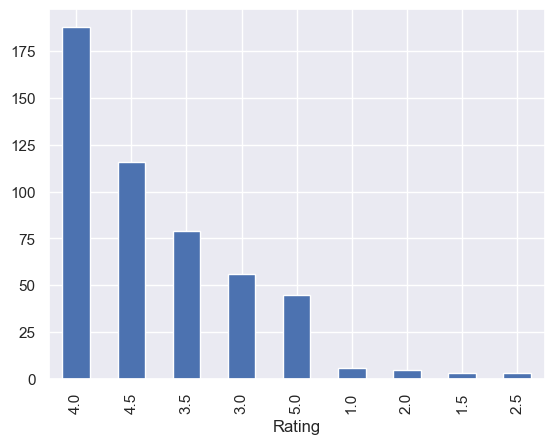

In [101]:
df_joined_data["Rating"].value_counts().plot(kind="bar")

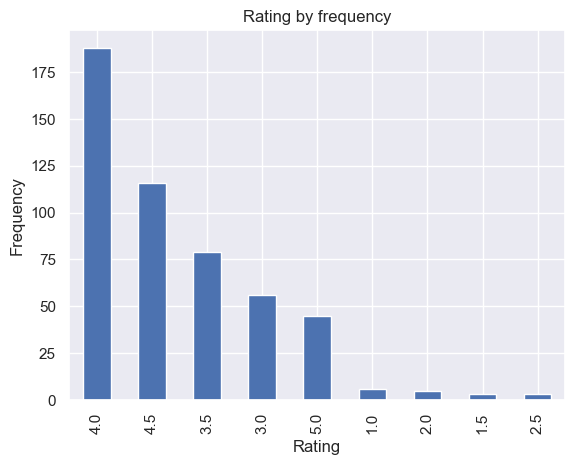

In [102]:
df_joined_data["Rating"].value_counts().plot(kind="bar")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Rating by frequency")

plt.savefig("../images/barplot_rating_freq.png")

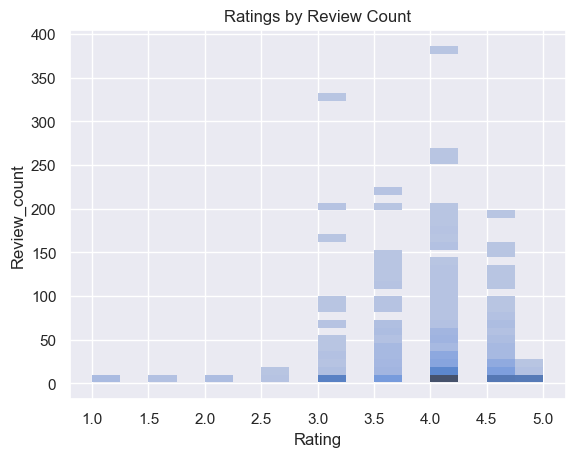

In [103]:
sns.histplot(x=df_pois_data["Rating"], y=df_pois_data["Review_count"])
plt.title("Ratings by Review Count")

plt.savefig("../images/hist_rating_reviews.png")

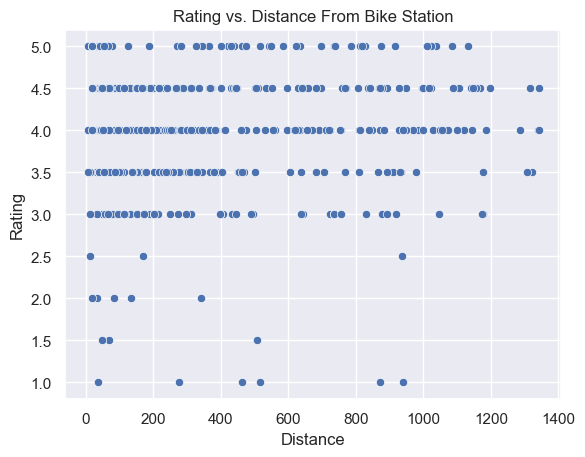

In [104]:
sns.scatterplot(x=df_joined_data["Distance"], y=df_joined_data["Rating"])
plt.xlabel("Distance")
plt.ylabel("Rating")
plt.title("Rating vs. Distance From Bike Station")

plt.savefig("../images/statterplot_distance_rating.png")

<Axes: ylabel='Density'>

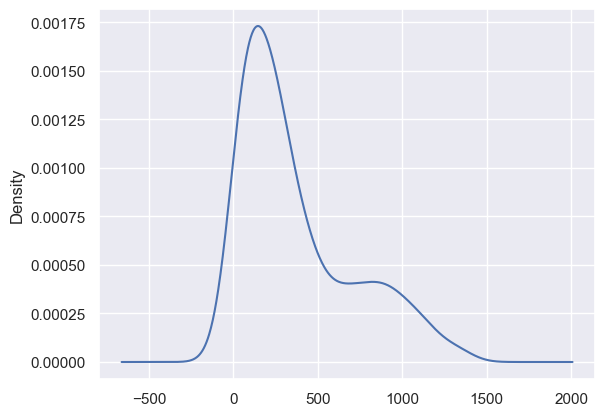

In [105]:
df_pois_data["Distance"].plot(kind="density")

<Axes: ylabel='Category'>

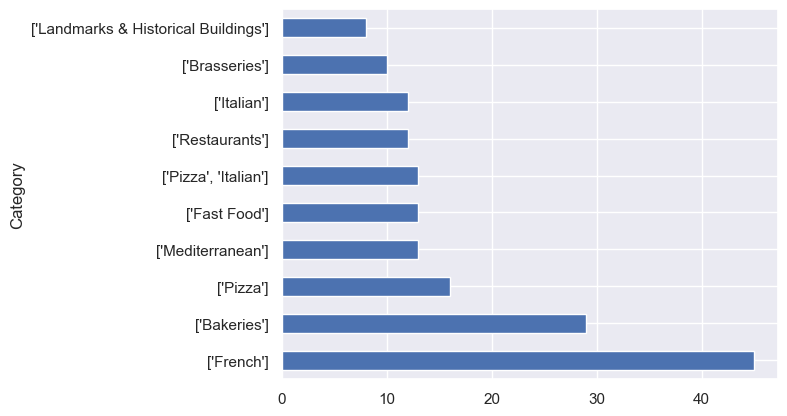

In [106]:
df_pois_data["Category"].value_counts().head(10).plot(kind="barh")

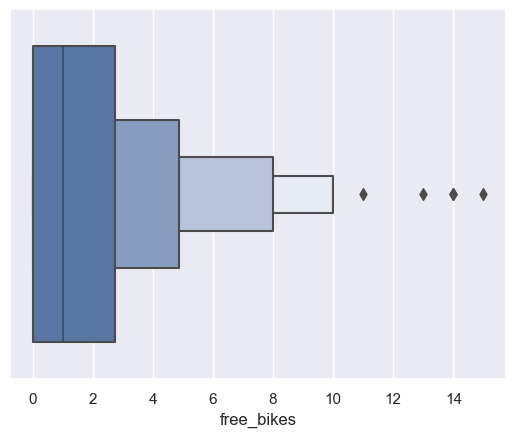

In [107]:
mean_available_bikes = df_bike_stations

sns.boxenplot(x=df_bike_stations["free_bikes"])

plt.savefig("../images/boxplot.png")

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


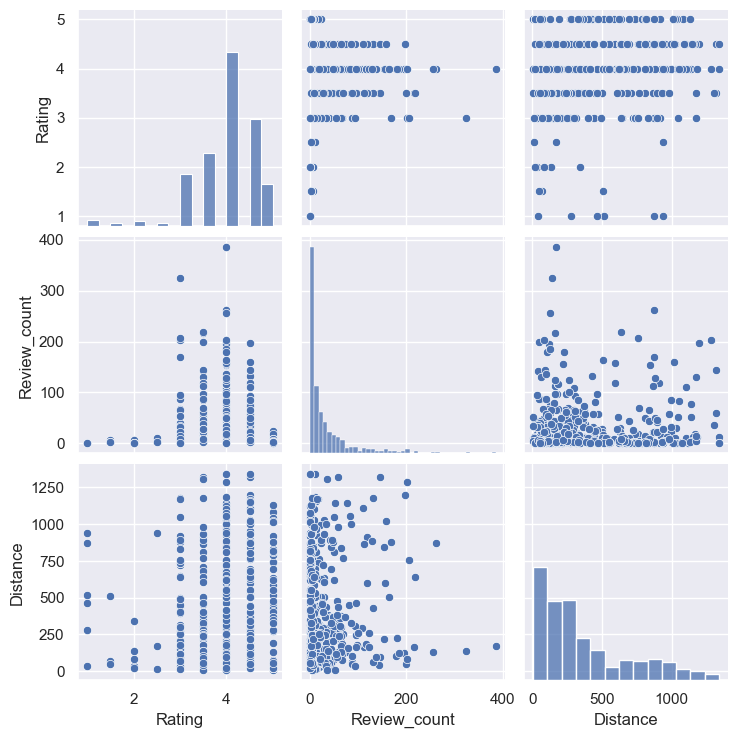

In [108]:
sns.pairplot(df_pois_data[["Rating", "Review_count", "Distance"]])
plt.savefig("../images/pairplot1.png")
plt.show() 

c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


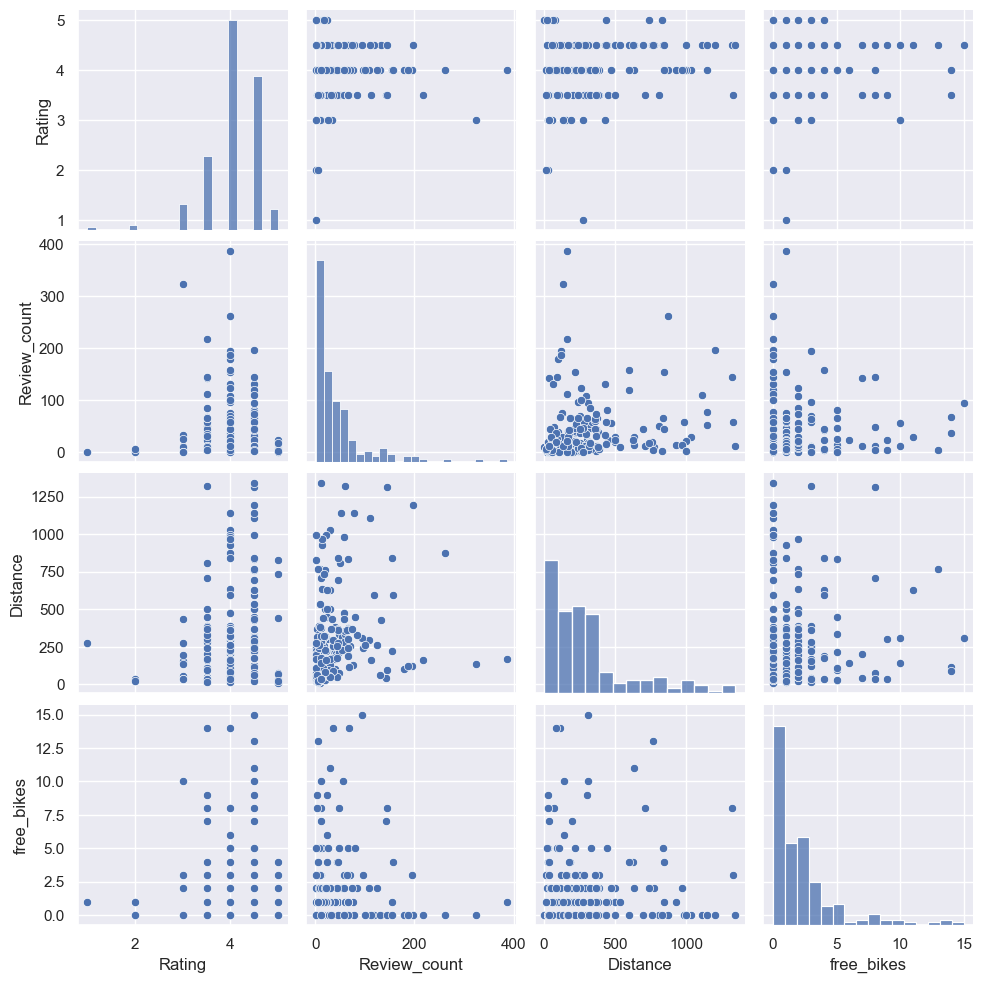

<Figure size 640x480 with 0 Axes>

In [109]:
merged_data = pd.merge(df_pois_data[["Rating", "Review_count", "Distance"]],
                       df_bike_stations[["free_bikes"]],
                       left_index=True, right_index=True, how="inner")

sns.pairplot(merged_data)
plt.show()

plt.savefig("../images/pairplot2.png")

# Database

In [110]:
import sqlite3

from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.